/Users/ilalucnikov/miniconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


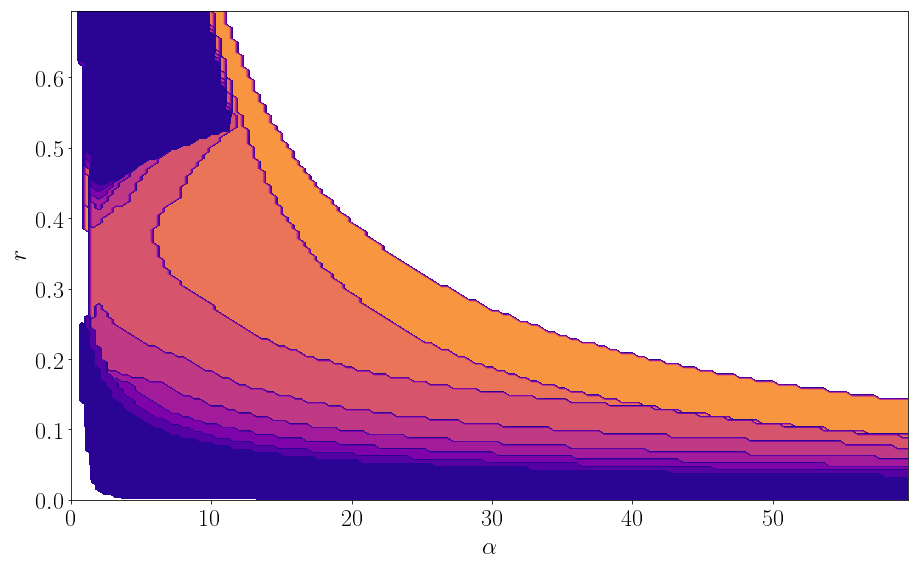

In [4]:
import mf_mdp as mm

import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'], 'size':24})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
rc('xtick', labelsize=24)
rc('ytick', labelsize=24)

############
#parameters
############
nn = 12 #number of states in comfortable zone
qq = np.arange(1,12,1) #array of number of states in uncomfortable zone
dr = 0.005
dalpha = 0.4
max_alpha = 60
max_r = 0.7
epsilon = 0.05
############
############

coef = qq[-1] + 1
y = np.arange(0, max_r, dr)
x = np.arange(0, max_alpha, dalpha)
fig = plt.figure()
fig.set_size_inches(15., 9.)  
for a in qq:
    q = a
    n = nn + 2*a
    gaps = np.array([])
    alpha = 0.
    for k in range(int(max_alpha/dalpha)):
        r = 0.
        for m in range(int(max_r/dr)):
            model = mm.mf_mdp_model(n = n, q = q, epsilon = epsilon, alpha = alpha, r = r)
            gap = model.gap()
            gaps = np.append(gaps, gap)
            r = r + dr
        alpha = alpha + dalpha
    gaps = gaps.reshape(-1, int(max_r/dr))
    gaps = gaps.T
        
    #plotting  
    plt.contourf(x, y, coef*np.heaviside(gaps, 0), levels=qq + 1, cmap = 'plasma')
    plt.xlabel(r'$\alpha$')
    plt.ylabel(r'$r$')
    coef = coef - 1
plt.savefig('Gap_vs_number_of_states.pdf')